In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import seaborn as sns
from keras.datasets import mnist
from PIL import Image
tf.random.set_seed(3)
from tensorflow.math import confusion_matrix
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.models import Sequential


# Loading Dataset

In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [5]:
#these images are in fomr of numpy array
print(type(X_train))

<class 'numpy.ndarray'>


In [6]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape) # the label is stored in y_train and y_test

# training data 60000 images and testing data has 10000 images having dimension 28*28 
#greyscale images

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
X_train[10].shape

(28, 28)

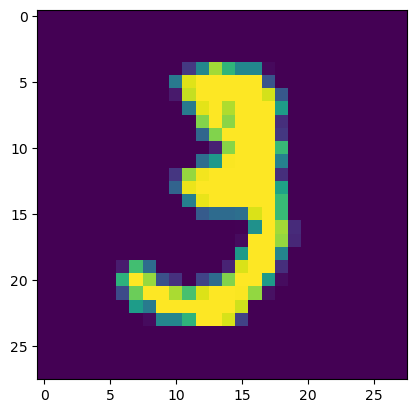

In [9]:
#displaying image

plt.imshow(X_train[10])
plt.show()

In [10]:
# priting corresponding label

y_train[10]

3

In [11]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [12]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [13]:
# we can use these label or do one hot encoding

In [14]:
#scaling the values
# all values are between 0-255 ,we will convert them into 0 to 1

In [15]:
X_train=X_train/255
X_test=X_test/255

In [16]:
# building neural network

In [17]:
# setting up layers

In [18]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')  # Use softmax for multi-class classification
])

C:\Users\kunal\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# compiling neural netowrk
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [20]:
# trianing neural network
model.fit(X_train,y_train,epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8455 - loss: 0.5256
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9535 - loss: 0.1589
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9659 - loss: 0.1142
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9744 - loss: 0.0878
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9789 - loss: 0.0711
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9826 - loss: 0.0581
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9854 - loss: 0.0496
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9872 - loss: 0.0424
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0375
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0330


In [21]:
#accuracy on test data

In [22]:
loss,accuracy=model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1353


In [23]:
print(accuracy)

0.9710000157356262


In [24]:
#test data acuuracy is ~97%

In [25]:
print(X_test.shape)

(10000, 28, 28)


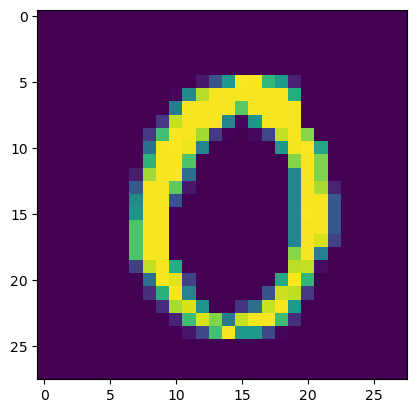

In [26]:
plt.imshow(X_test[13])
plt.show()

In [27]:
print(y_test[13])

0


In [28]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
print(y_pred.shape)

(10000, 10)


In [30]:
print(y_pred[13])

[9.9998546e-01 7.5991058e-16 1.6377038e-06 6.5538580e-10 1.6483201e-15
 1.2215715e-09 3.4172658e-11 2.8011950e-06 4.2543491e-07 9.6187050e-06]


In [31]:
# model.predict gives prediction probability of each class for that partcular datapoint

In [32]:
# convertin prediction probabilities to class labels


In [33]:
label_for_first_image=np.argmax(y_pred[13])

In [34]:
print(label_for_first_image)

0


In [35]:
## convertin prediction probabilities to class labels for all test data points


In [36]:
y_pred_labels=[np.argmax(i)for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 3, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [37]:
print(y_pred)

[[2.25298460e-10 2.89179181e-10 4.50735715e-09 ... 9.99169946e-01
  5.31267741e-09 6.61081169e-04]
 [3.36870052e-08 1.12516318e-07 9.99948740e-01 ... 1.65787157e-13
  3.90888744e-08 1.49390767e-13]
 [7.72924238e-07 9.97018576e-01 4.51041924e-05 ... 5.77101775e-04
  2.03809910e-03 9.20386015e-07]
 ...
 [1.29673439e-16 5.46868691e-17 3.72652039e-16 ... 1.61885449e-10
  3.56407925e-09 1.57663757e-10]
 [3.92133767e-14 6.58654208e-12 7.95246570e-16 ... 1.57641759e-14
  1.11312985e-08 1.19835495e-16]
 [2.65555026e-12 8.99363913e-16 3.12814011e-14 ... 3.27048211e-21
  7.88881222e-14 7.47104632e-17]]


In [38]:
# y_test are true labels and y_pred_labels represent predicted labels

In [39]:
confusion_matrix=confusion_matrix(y_test,y_pred_labels)

In [40]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    3,    4,    2,    4,    1,    1,    1,    5],
       [   0, 1117,    3,    2,    1,    1,    4,    1,    6,    0],
       [   3,    1,  994,   16,    1,    0,    1,    7,    8,    1],
       [   0,    0,    1,  995,    0,    4,    1,    4,    4,    1],
       [   0,    0,    3,    0,  960,    0,    5,    4,    1,    9],
       [   2,    1,    0,   19,    3,  854,    5,    0,    5,    3],
       [   5,    3,    3,    4,    3,    8,  928,    0,    4,    0],
       [   0,    0,    6,    2,    2,    0,    0, 1009,    2,    7],
       [   1,    0,    5,   28,    5,    9,    0,    2,  919,    5],
       [   1,    1,    0,    5,   15,    2,    1,    3,    6,  975]])>

Text(0.5, 47.7222222222222, 'predicted labels')

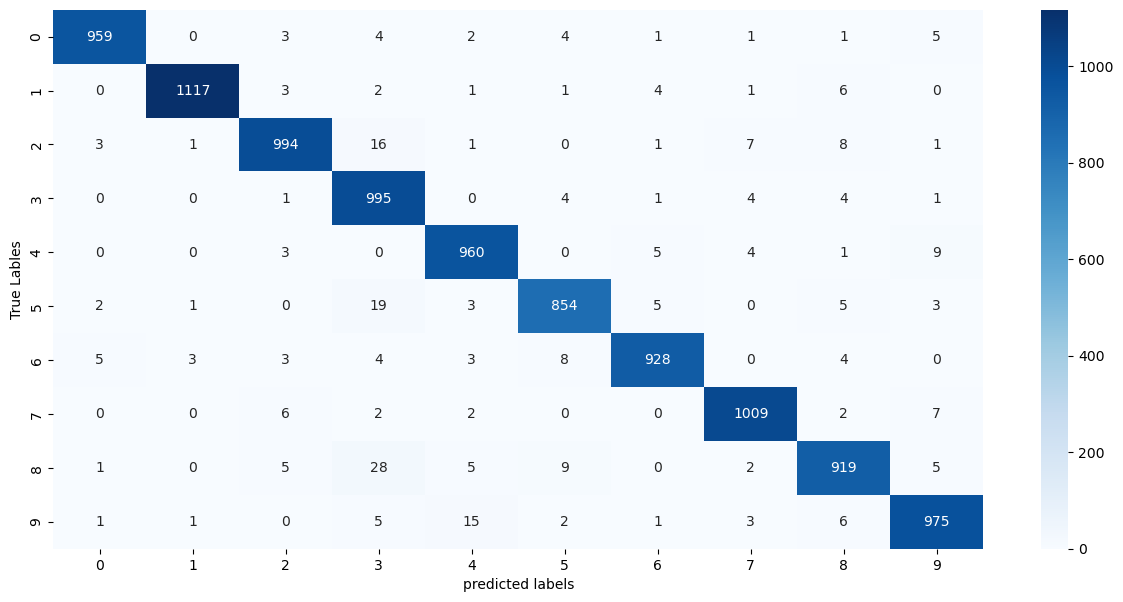

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap='Blues') #fmt =d gives value in integers
plt.ylabel('True Lables')
plt.xlabel('predicted labels')

In [42]:
ip_image=('MNIST_digit.png')

In [43]:
type(ip_image)

str

In [44]:
ip_image=cv2.imread(ip_image)

In [45]:
type(ip_image)

numpy.ndarray

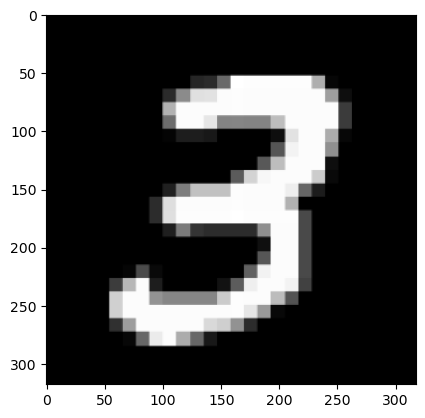

In [46]:
plt.imshow(ip_image)

In [47]:
'''
import cv2
from matplotlib import pyplot as plt

# Load and display an image
img = cv2.imread('image.jpg')  # Replace 'image.jpg' with your image file path
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

'''

"\nimport cv2\nfrom matplotlib import pyplot as plt\n\n# Load and display an image\nimg = cv2.imread('image.jpg')  # Replace 'image.jpg' with your image file path\nimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB (Matplotlib)\nplt.imshow(img)\nplt.axis('off')  # Hide axes\nplt.show()\n\n"

In [48]:
ip_image.shape

(318, 318, 3)

In [49]:
greyscale=cv2.cvtColor(ip_image,cv2.COLOR_RGB2GRAY)

In [50]:
greyscale.shape

(318, 318)

In [51]:
ip_resized=cv2.resize(greyscale,(28,28))

In [52]:
ip_resized.shape

(28, 28)

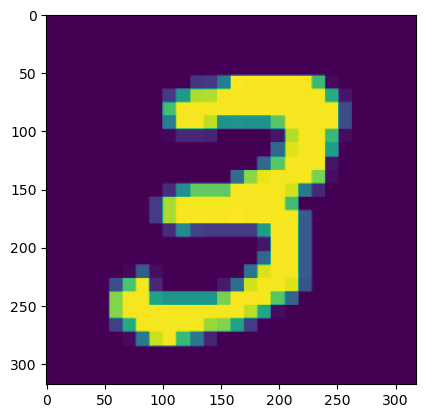

In [53]:
plt.imshow(greyscale)
plt.show()

In [54]:
ip_resized=ip_resized/255

In [55]:
image_reshaped=np.reshape(ip_resized,[1,28,28])

In [56]:
ip_pred=model.predict(image_reshaped)
print(ip_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[8.8135856e-19 9.6801199e-20 1.1660276e-15 1.0000000e+00 5.0865705e-27
  3.8641564e-12 1.3882118e-26 3.7395218e-16 1.1906658e-12 1.2812562e-11]]


In [57]:
ip_pred_label=np.argmax(ip_pred)

In [58]:
print(ip_pred_label)

3


In [59]:
# predictive system

Enter path of the image C:\Users\kunal\Downloads\MNIST_digit.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The digit recognised as 3


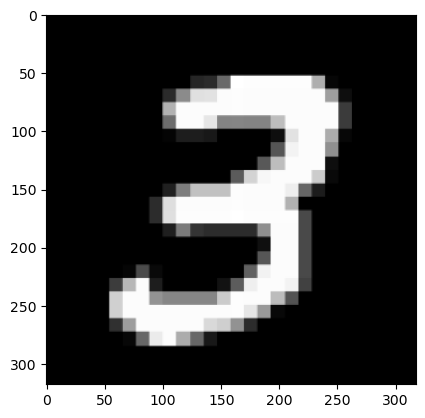

In [143]:

input_image_path=input('Enter path of the image')
input_image=cv2.imread(input_image_path)
plt.imshow(input_image)
greyscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize=cv2.resize(greyscale,(28,28))
input_image_resize=input_image_resize/255
image_reshaped=np.reshape(input_image_resize,[1,28,28])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)
print('The digit recognised as',input_pred_label)


In [147]:
model=model.save('digit_recog.h5')